Шишка Антон (Варіант 30)

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import seaborn as sns
import matplotlib.pyplot as plt

Загрузити датасет, що містить інформацію про відвідуваність музеїв в різні роки.

In [14]:
my_file = files.upload()

df = pd.read_csv('museum_visitors.csv', encoding='ISO-8859-1')

Saving museum_visitors.csv to museum_visitors (2).csv


Вивести перші 5 рядків датасету.

In [15]:
print(df.head())

         Date  Avila Adobe  Firehouse Museum  Chinese American Museum  \
0  2014-01-01        24778              4486                     1581   
1  2014-02-01        18976              4172                     1785   
2  2014-03-01        25231              7082                     3229   
3  2014-04-01        26989              6756                     2129   
4  2014-05-01        36883             10858                     3676   

   America Tropical Interpretive Center  
0                                  6602  
1                                  5029  
2                                  8129  
3                                  2824  
4                                 10694  


Провести попередній аналіз даних (визначити розмір датасету, тип даних, кількість пропусків).

In [16]:
print(df.info())  # Інформація про датасет
print(df.isnull().sum())  # Кількість пропусків
print(df.duplicated().sum())  # Кількість дублікатів

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Date                                  59 non-null     object
 1   Avila Adobe                           59 non-null     int64 
 2   Firehouse Museum                      59 non-null     int64 
 3   Chinese American Museum               59 non-null     int64 
 4   America Tropical Interpretive Center  59 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 2.4+ KB
None
Date                                    0
Avila Adobe                             0
Firehouse Museum                        0
Chinese American Museum                 0
America Tropical Interpretive Center    0
dtype: int64
0


Перевірити наявність дублікатів. Якщо є, видалити їх і вивести розмір таблиці (без дублікатів).

In [17]:
df = df.drop_duplicates()
print(df.shape)

(59, 5)


Про які роки містить інформацію датасет.

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
unique_years = df['Date'].dt.year.unique()
print(unique_years)

[2014 2015 2016 2017 2018]


Змінити назви столбців. Замінити великі букви на маленьки, пробіли на підкреслення (date, avila_adobe, firehouse_museum, chinese_american_museum, america_tropical_interpretive_center).

In [21]:
df.columns = ['date', 'avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

Обчислити середню кількість відвідувачів для кожного музею протягом всього періоду.

In [22]:
avg_visitors = df.mean()

<ipython-input-22-c2408a17252b>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  avg_visitors = df.mean()


Знайти мінімальну та максимальну кількість відвідувачів для кожного музею за 2018 рік

In [25]:
df['date'] = pd.to_datetime(df['date'])

visitors_2018 = df[df['date'].dt.year == 2018]

min_visitors_2018 = visitors_2018.min(numeric_only=True)
max_visitors_2018 = visitors_2018.max(numeric_only=True)

print("Мінімальна кількість відвідувачів за 2018 рік:")
print(min_visitors_2018)
print("\nМаксимальна кількість відвідувачів за 2018 рік:")
print(max_visitors_2018)

Мінімальна кількість відвідувачів за 2018 рік:
avila_adobe                             14718
firehouse_museum                         3306
chinese_american_museum                  2146
america_tropical_interpretive_center     3180
dtype: int64

Максимальна кількість відвідувачів за 2018 рік:
avila_adobe                             25173
firehouse_museum                         8013
chinese_american_museum                  4960
america_tropical_interpretive_center     5837
dtype: int64


Визначити місяці з найвищою і найнижчою загальною кількістю відвідувачів серед усіх музеїв для 2015 року. Вивести назви місяців (не цифри).

In [29]:
visitors_2015 = df[df['date'].dt.year == 2015]

monthly_visitors_2015 = visitors_2015.groupby(visitors_2015['date'].dt.month)['avila_adobe'].sum()

max_month = monthly_visitors_2015.idxmax()

min_month = monthly_visitors_2015.idxmin()

month_names = {1: 'Січень', 2: 'Лютий', 3: 'Березень', 4: 'Квітень', 5: 'Травень', 6: 'Червень',
               7: 'Липень', 8: 'Серпень', 9: 'Вересень', 10: 'Жовтень', 11: 'Листопад', 12: 'Грудень'}

print(f"Місяць з найвищою кількістю відвідувачів у 2015 році: {month_names[max_month]}")
print(f"Місяць з найнижчою кількістю відвідувачів у 2015 році: {month_names[min_month]}")


Місяць з найвищою кількістю відвідувачів у 2015 році: Липень
Місяць з найнижчою кількістю відвідувачів у 2015 році: Лютий


Порівняти кількість відвідувачів музею "Avila Adobe" у літні і зимові місяці 2018 року

In [32]:
visitors_2018 = df[df['date'].dt.year == 2018]

summer_months = [6, 7, 8]
winter_months = [12, 1, 2]

summer_visitors = visitors_2018[visitors_2018['date'].dt.month.isin(summer_months)]['avila_adobe']
winter_visitors = visitors_2018[visitors_2018['date'].dt.month.isin(winter_months)]['avila_adobe']

summer_visitors_total = summer_visitors.sum()
winter_visitors_total = winter_visitors.sum()

print(f"Загальна кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: {summer_visitors_total}")
print(f"Загальна кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: {winter_visitors_total}")

Загальна кількість відвідувачів музею 'Avila Adobe' у літні місяці 2018 року: 66122
Загальна кількість відвідувачів музею 'Avila Adobe' у зимові місяці 2018 року: 30983


Знайти кореляцію між кількістю відвідувачів в кожному з музеїв  та датами у 2016 році

In [33]:
visitors_2016 = df[df['date'].dt.year == 2016]

museums_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

correlation_matrix = visitors_2016[museums_columns].corr()

print(correlation_matrix)

                                      avila_adobe  firehouse_museum  \
avila_adobe                              1.000000          0.737200   
firehouse_museum                         0.737200          1.000000   
chinese_american_museum                  0.089054          0.553935   
america_tropical_interpretive_center     0.436561          0.247389   

                                      chinese_american_museum  \
avila_adobe                                          0.089054   
firehouse_museum                                     0.553935   
chinese_american_museum                              1.000000   
america_tropical_interpretive_center                 0.443800   

                                      america_tropical_interpretive_center  
avila_adobe                                                       0.436561  
firehouse_museum                                                  0.247389  
chinese_american_museum                                           0.443800  
america_tr

Побудувати теплокарту кореляції для попереднього завдання.

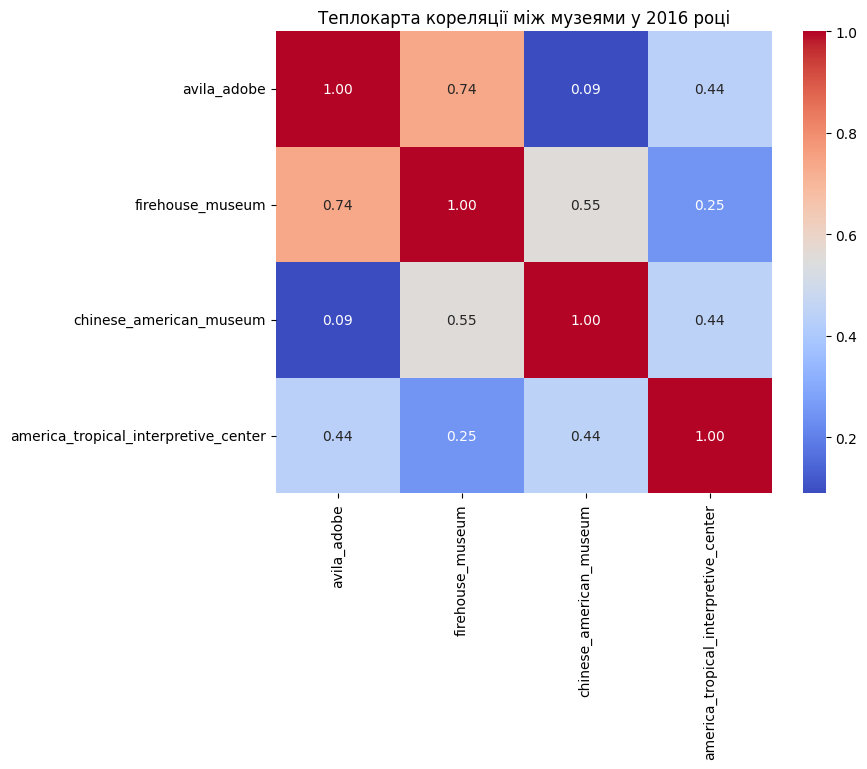

In [35]:
visitors_2016 = df[df['date'].dt.year == 2016]

museums_columns = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

correlation_matrix = visitors_2016[museums_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Теплокарта кореляції між музеями у 2016 році')
plt.show()

Побудувати графік ліній для кожного музею, показуючи їхню відвідуваність протягом 2017 року.

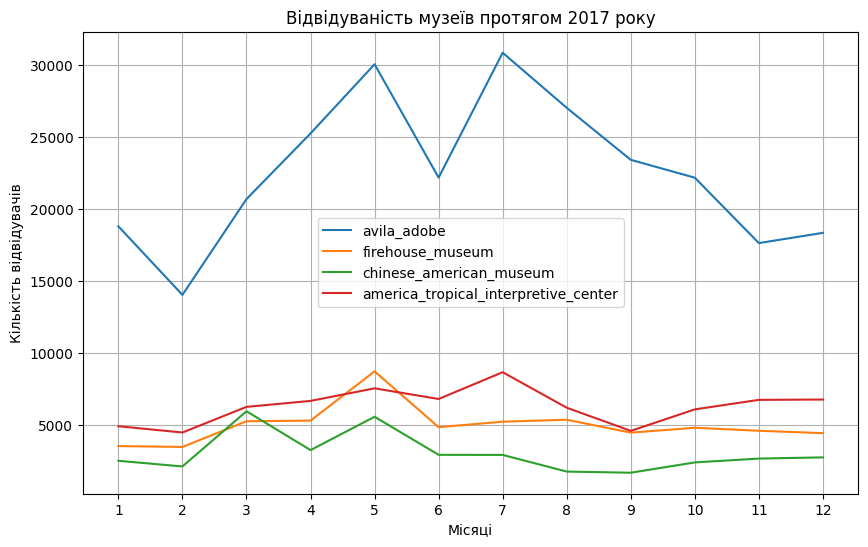

In [36]:
visitors_2017 = df[df['date'].dt.year == 2017]

museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

plt.figure(figsize=(10, 6))

for museum in museums:
    museum_visits_2017 = visitors_2017.groupby(visitors_2017['date'].dt.month)[museum].sum()
    plt.plot(museum_visits_2017, label=museum)

plt.xlabel('Місяці')
plt.ylabel('Кількість відвідувачів')
plt.title('Відвідуваність музеїв протягом 2017 року')
plt.legend()
plt.xticks(range(1, 13))
plt.grid(True)
plt.show()

Побудувати графіки розсіювання для кожного музею за 2018 рік

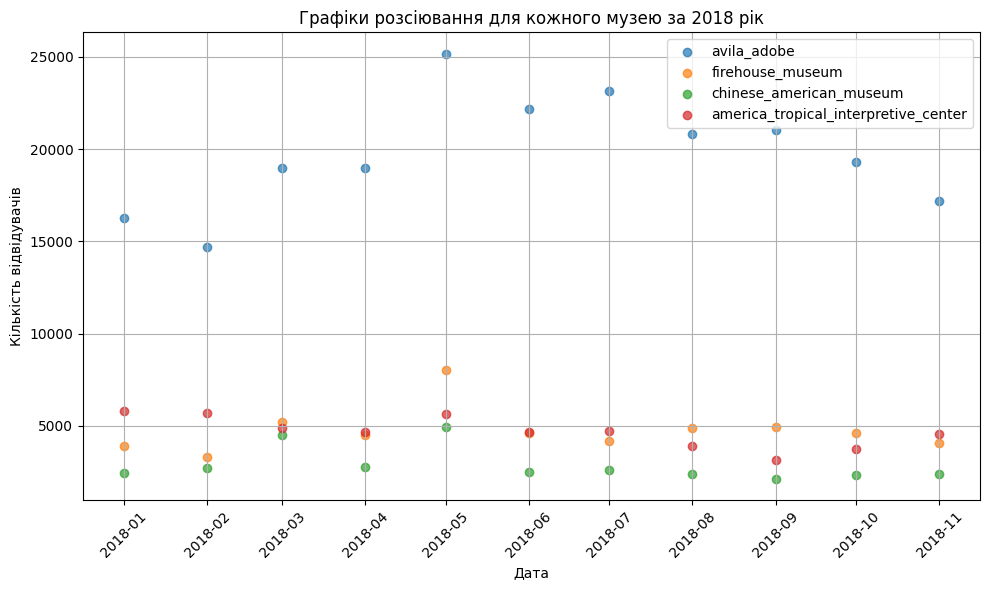

In [37]:
visitors_2018 = df[df['date'].dt.year == 2018]

museums = ['avila_adobe', 'firehouse_museum', 'chinese_american_museum', 'america_tropical_interpretive_center']

plt.figure(figsize=(10, 6))

for museum in museums:
    plt.scatter(visitors_2018['date'], visitors_2018[museum], label=museum, alpha=0.7)

plt.xlabel('Дата')
plt.ylabel('Кількість відвідувачів')
plt.title('Графіки розсіювання для кожного музею за 2018 рік')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Гістограма відвідуваності за місяцями кожного музею. Вивести 4 графіки: за 2014, 2015, 2016, 2017 роки. Графіки розташовані два зверху, два знизу, колір першого графіка - синій, другого зелений, третього жовтий, четвертого сірий.

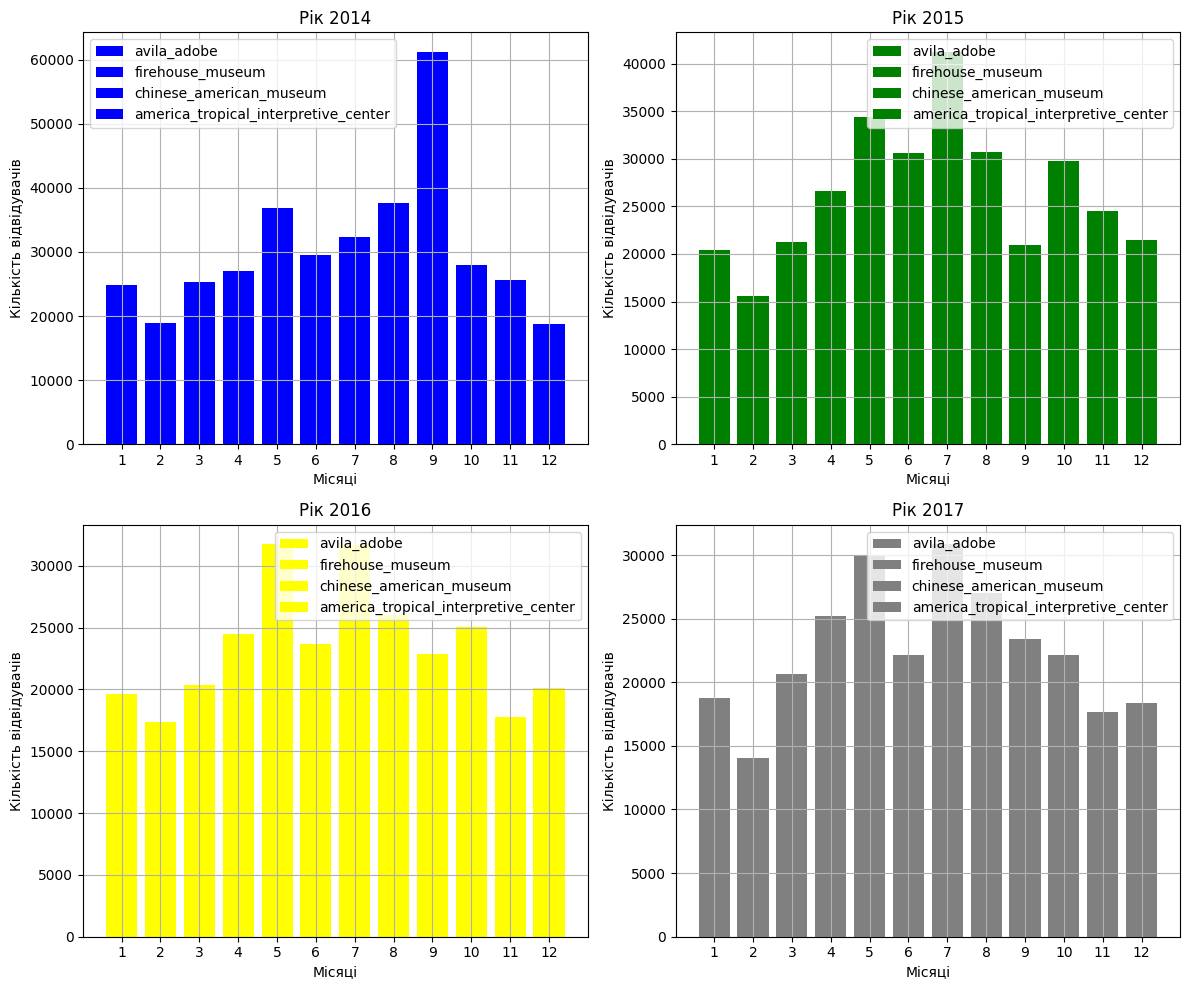

In [40]:
years = [2014, 2015, 2016, 2017]

colors = ['blue', 'green', 'yellow', 'grey']

plt.figure(figsize=(12, 10))

for i, year in enumerate(years):
    visitors_year = df[df['date'].dt.year == year]

    plt.subplot(2, 2, i + 1)
    for j, museum in enumerate(museums):
        museum_visits = visitors_year.groupby(visitors_year['date'].dt.month)[museum].sum()
        plt.bar(museum_visits.index, museum_visits.values, color=colors[i])

    plt.title(f'Рік {year}')
    plt.xlabel('Місяці')
    plt.ylabel('Кількість відвідувачів')
    plt.xticks(range(1, 13))
    plt.legend(museums)
    plt.grid(True)

plt.tight_layout()
plt.show()

**Висновок**

Аналізуючи дані про відвідуваність музеїв протягом кількох років, стало зрозуміло, що різні музеї мають різні тенденції відвідуваності в різні періоди. Наприклад, були виявлені відмінності у кількості відвідувачів під час різних сезонів, а також спостерігалася зв'язаність між музеями у певні роки, що може бути цікавим для подальших досліджень.